In [15]:
!pip install pandas
!pip install spacy
!pip install spacymoji
!pip install spacy_ngram
!python -m spacy download pt_core_news_sm



427.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


433.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


439.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


445.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


451.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.7 MB/s  0:00:00eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [16]:
import pandas as pd
import numpy as np
from collections import Counter
import spacy
from spacymoji import Emoji
from spacy_ngram import NgramComponent
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('HateBR.csv')
df.head()

,id,comentario,anotator1,anotator2,anotator3,label_final,links_post,account_post
0,1,Mais um lixo,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
1,2,Essa nao tem vergonha na cara!!,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
2,3,Essa mulher é doente.pilantra!,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
3,4,Comunista safada...,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
4,5,Vagabunda. Comunista. Mentirosa. O povo chilen...,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli


In [18]:
# mark end of sentence in every line
df['comentario'] = df['comentario'].apply(lambda x: x.strip() + '.' if not x.strip().endswith(('.', '?', '!')) else x.strip())
df['comentario'] = df['comentario'].str.replace(r'k{3,}', '', regex=True) # delete 'laughter'



In [19]:
all_text = " ".join(df['comentario'].astype(str).tolist())
all_text[5000:10000]

'a cretina, vai cuidar do seu país..ah não te querem lá. Então vai pro inferno coisa ruim. Toma distraída!!! Velha idiota comunista e corrupta . Demagoga se locupletando com dinheiro de propina. Porque é bandida igualmente a o presidiário cachaceiro do Lula. Eu tenho pena é de você não ter sido da época do grande General Pinochet que lamentavelmente deixou sobrar este resquício de desgraça. Cai fora o Brasil não precisa de você. tá se revelando! corrupta ...nesse governo a gente tá realmente vendo quem é honesto e quem no presta! Falou...Bacheria. . ...Brcelet.... ou seja lá como queira ser chamada sua raposa velhaca. Bandidona e pilantrona o leitinho acabou. Hipooooooócrita essa senhoura... Exato! Ela é um escrota! Outra pilantra! Farinha do mesmo saco nojo desses políticos. Essa senhora é uma currupta igual seus amiguinhos do PT. Cada coisa que aparece!!! Internacionarizaram a propina e a corrupção!!! Agora tem pena do Brasil, tem que ter pena dela mesmo, afinal ficou sem os recursos

In [20]:
# delete multiple terminal punctations
# reduce number of sentences: 13771-13259 = 512
endings = ['.', '!', '?']
idx = 0
while idx < len(all_text) - 1:
    if all_text[idx] in endings and all_text[idx + 1] in endings:
        all_text = all_text[:idx + 1] + all_text[idx + 2:]
    else:
        idx += 1

print(all_text[5000:10000])

# --- additional thoughts
# leave '@' sign because the names got caught in the correct way by spacy

 te querem lá. Então vai pro inferno coisa ruim. Toma distraída! Velha idiota comunista e corrupta . Demagoga se locupletando com dinheiro de propina. Porque é bandida igualmente a o presidiário cachaceiro do Lula. Eu tenho pena é de você não ter sido da época do grande General Pinochet que lamentavelmente deixou sobrar este resquício de desgraça. Cai fora o Brasil não precisa de você. tá se revelando! corrupta .nesse governo a gente tá realmente vendo quem é honesto e quem no presta! Falou.Bacheria. . .Brcelet. ou seja lá como queira ser chamada sua raposa velhaca. Bandidona e pilantrona o leitinho acabou. Hipooooooócrita essa senhoura. Exato! Ela é um escrota! Outra pilantra! Farinha do mesmo saco nojo desses políticos. Essa senhora é uma currupta igual seus amiguinhos do PT. Cada coisa que aparece! Internacionarizaram a propina e a corrupção! Agora tem pena do Brasil, tem que ter pena dela mesmo, afinal ficou sem os recursos ilícitos! Devolva o dinheiro. Pq. ELa é SAFADA igual ao 9 

In [21]:
# number of sentences
nlp = spacy.load('pt_core_news_sm')
emoji = Emoji(nlp)
nlp.add_pipe("emoji", first=True)
nlp.add_pipe('spacy-ngram', config={'ngrams': (2, 3, 4)})

doc = nlp(all_text)

In [ ]:
num_sents=0
for sent in doc.sents:
    num_sents += 1

print("number of sentences: {}".format(num_sents))

number of sentences: 13259


In [ ]:
# TODO: NOT remove punctuation in token?

all_sentences=[]
sents_len_character =[] # with emojis and spaces
sents_len_words = [] # sentence len by words
token_str = [] 
sentence_token = []
word_form_len = []
num_token = 0
num_types = 0
conj_freq = 0

for sent in doc.sents:
    sents_len_character.append(len(str(sent))) #with emojis
    sents_str = []
    sents_t = []

    for t in sent:
        if not (t._.is_emoji or t.is_punct or t.is_space): # almost no occurence of ASCII emojis
            if t != None:
                sents_str.append(t.text.lower()) # for list with sents
                sents_t.append(t)
                token_str.append(t.text.lower()) # for list with token_str
                if t.pos_ == 'CONJ' or t.pos_ == 'CCONJ':
                    conj_freq += 1
    #sentence = [t.text.lower() for t in sent if not (t._.is_emoji or t.is_punct or t.is_space)] #as str; try to get rid of
    #sentence_t = [t for t in sent if not (t._.is_emoji or t.is_punct or t.is_space)] #as token
    if sents_t != []:
        sentence_token.append(sents_t)
    if sents_str != []:
        all_sentences.append(sents_str) 
        sents_len_words.append(len(sents_str))

num_sentences = len(all_sentences)
num_types = len(set(token_str)) # no duplicates
num_token = len(token_str)

#concat sentences
all_sentences_concat = [" ".join(sentence) for sentence in all_sentences] # For Deliv 4

# get rid of empty sentences -> remove 856
idx = 0
for s in all_sentences_concat:
    if s == '':
        all_sentences_concat.pop(idx)
    idx+=1

# avg sentence length
sents_len_character = sum(sents_len_character)/num_sentences
sents_len_words = sum(sents_len_words)/num_sentences

# word form length
word_form_len = [len(str(t)) for t in token_str]
word_form_len = sum(word_form_len)/num_token

# hapax legomena
ctr = Counter(token_str)
hapax = [token for token, count in ctr.items() if count==1]

# most frequent words
most_common = ctr.most_common(5)

# Zipf
freq_sorted = ctr.most_common()
words, counts = zip(*freq_sorted)

# häufigste wörter 
ranks = list(range(1, len(counts) + 1)) 

# conjunction frequency
conj_freq /= num_token


print('Number of sentences: {0} \n'.format(num_sentences)+
      'Number of token: {0}'.format(num_token))
print('Number of types: '+ str(num_types))
print('Avg. sentence length in characters: {0:2.2f}'.format(sents_len_character))
print('Avg. sentence length in words: {0:2.2f}'.format(sents_len_words))
print('Avg. word form length: {0:2.2f}'.format(word_form_len))
print('Number of hapax legomena: '+str(len(hapax)))
print('Most frequent words '+str(most_common))
print('Conjunction frequency: {0:2.2f}%'.format(conj_freq*100))


Number of sentences: 12116 
Number of token: 95527
Number of types: 12495
Avg. sentence length in characters: 46.77
Avg. sentence length in words: 7.88
Avg. word form length: 4.77
Number of hapax legomena: 7427
Most frequent words [('que', 2829), ('de', 2629), ('o', 2625), ('e', 2415), ('a', 2283)]
Conjunction frequency: 3.17%


In [ ]:
# hapax without @-mentions
num_mentions = 0
for sent in all_sentences:
    for s in sent:
        if '@' in s:
            num_mentions+=1
            
print('Hapax legomena: {} \nHapax legomena without (@)mentions {}.'.format(len(hapax), len(hapax)-num_mentions))



Hapax legomena: 7427 
Hapax legomena without (@)mentions 6820.


## n_grams

In [ ]:
# join cleaned text
doc_clean = " ".join(token_str)

# create token from cleaned text
doc_clean = nlp(doc_clean)
bigrams = doc_clean._.ngram_2
trigrams = doc_clean._.ngram_3
four_grams = doc_clean._.ngram_4

bigram_counts = Counter(bigrams)
trigrams_counts = Counter(trigrams)
four_grams_counts = Counter(four_grams)

print(bigram_counts.most_common(5))
print(trigrams_counts.most_common(5))
print(four_grams_counts.most_common(5)) # 'mimimi' and 'mi mi mi' left in data due to too little occurrence 

[('presidente_bolsonaro', 42), ('deus_abençoe', 40), ('passar_vergonha', 35), ('fake_news', 32), ('colégio_militar', 27)]
[('cansar_passar_vergonha', 12), ('globolixo_globolixo_globolixo', 8), ('parabéns_parabéns_parabéns', 8), ('mi_mi_mi', 7), ('voltar_pra_cadeia', 7)]
[('globolixo_globolixo_globolixo_globolixo', 7), ('parabéns_parabéns_parabéns_parabéns', 7), ('mi_mi_mi_mi', 5), ('brasil_acima_deus_acima', 5), ('ninguém_soltar_mão_ninguém', 4)]


In [ ]:
# DELETE

'''
from collections import Counter
from itertools import islice

# Hilfsfunktion: generische n-gram Erzeugung aus Token-Iterable
def get_ngrams(tokens, n):
    # tokens: list oder iterable von strings
    if n <= 0:
        return []
    # erzeugt Generator von n-grams als Tupel
    return zip(*[islice(tokens, i, None) for i in range(n)])

# n-gram Counters (über alle Sätze, ohne Satzüberschreitung)
bigram_counts = Counter()
trigram_counts = Counter()
fourgram_counts = Counter()

for sent_tokens in all_sentences:
    # sent_tokens ist eine Liste von strings (bereinigte tokens)
    if len(sent_tokens) < 2:
        continue
    # bigrams innerhalb des Satzes
    bigram_counts.update(get_ngrams(sent_tokens, 2))
    if len(sent_tokens) >= 3:
        trigram_counts.update(get_ngrams(sent_tokens, 3))
    if len(sent_tokens) >= 4:
        fourgram_counts.update(get_ngrams(sent_tokens, 4))

# Häufigstes n-gram
most_common_bigram, bigram_freq = bigram_counts.most_common(1)[0] if bigram_counts else (None, 0)
most_common_trigram, trigram_freq = trigram_counts.most_common(1)[0] if trigram_counts else (None, 0)
most_common_fourgram, fourgram_freq = fourgram_counts.most_common(1)[0] if fourgram_counts else (None, 0)

# Beispiel-Ausdruck (ähnlich deinem Print-Block)
#print('Number of sentences:', num_sentences)
#print('Number of token:', num_token)
#print('Number of types:', num_types)
print('Most frequent n_grams:')
print(' - Bigrams (top 5):', bigram_counts.most_common(5))
print(' - Trigrams (top 5):', trigram_counts.most_common(5))
print(' - Fourgrams (top 5):', fourgram_counts.most_common(5))

# Wenn du die n-grams als lesbare Strings möchtest:
def ngram_to_str(tup):
    return " ".join(tup)

print('Most common bigram (string):', ngram_to_str(most_common_bigram) if most_common_bigram else None, bigram_freq)
'''

'\nfrom collections import Counter\nfrom itertools import islice\n\n# Hilfsfunktion: generische n-gram Erzeugung aus Token-Iterable\ndef get_ngrams(tokens, n):\n    # tokens: list oder iterable von strings\n    if n <= 0:\n        return []\n    # erzeugt Generator von n-grams als Tupel\n    return zip(*[islice(tokens, i, None) for i in range(n)])\n\n# n-gram Counters (über alle Sätze, ohne Satzüberschreitung)\nbigram_counts = Counter()\ntrigram_counts = Counter()\nfourgram_counts = Counter()\n\nfor sent_tokens in all_sentences:\n    # sent_tokens ist eine Liste von strings (bereinigte tokens)\n    if len(sent_tokens) < 2:\n        continue\n    # bigrams innerhalb des Satzes\n    bigram_counts.update(get_ngrams(sent_tokens, 2))\n    if len(sent_tokens) >= 3:\n        trigram_counts.update(get_ngrams(sent_tokens, 3))\n    if len(sent_tokens) >= 4:\n        fourgram_counts.update(get_ngrams(sent_tokens, 4))\n\n# Häufigstes n-gram\nmost_common_bigram, bigram_freq = bigram_counts.most_com

In [ ]:
# DELETE 
'''
all_bigrams = []
for text in all_sentences_concat:
    tokens = custom_word_tokenizer(text)
    if len(tokens) >= 2:
        all_bigrams.extend(get_ngrams(tokens, 2))

# Count bigram frequencies
bigram_freq = Counter(all_bigrams)
     

print("="*80)
print("TOP 30 MOST FREQUENT BIGRAMS")
print("="*80)
for i, (bigram, count) in enumerate(bigram_freq.most_common(30), 1):
    print(f"{i:3d}. {bigram[0]} {bigram[1]:20s} - {count:,} occurrences")
     
'''

'\nall_bigrams = []\nfor text in all_sentences_concat:\n    tokens = custom_word_tokenizer(text)\n    if len(tokens) >= 2:\n        all_bigrams.extend(get_ngrams(tokens, 2))\n\n# Count bigram frequencies\nbigram_freq = Counter(all_bigrams)\n     \n\nprint("="*80)\nprint("TOP 30 MOST FREQUENT BIGRAMS")\nprint("="*80)\nfor i, (bigram, count) in enumerate(bigram_freq.most_common(30), 1):\n    print(f"{i:3d}. {bigram[0]} {bigram[1]:20s} - {count:,} occurrences")\n     \n'

## Zipf's law

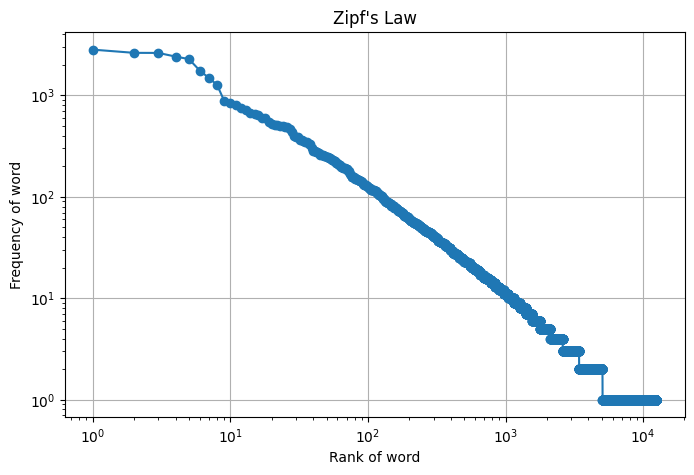

In [ ]:

#plot zipf
plt.figure(figsize=(8,5))
plt.loglog(ranks, counts, marker="o")
plt.xlabel("Rank of word")
plt.ylabel("Frequency of word")
plt.title("Zipf's Law")
plt.grid(True)
plt.show()

#### type token ratio:
- varies depending on corpus lenght!
- differ also because of the type of corpus (social media comments vs. books)..

In [ ]:
TTR = num_types/num_token
print('Type-token ratio: {0:2.4f}'.format(TTR))

Type-token ratio: 0.1308


# Deliverable 4

## Split data into train, test set

In [ ]:
from sklearn.model_selection import train_test_split
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go
#from PIL import Image
#import io

In [ ]:


train_texts, test_texts = train_test_split(
    all_sentences_concat, 
    test_size=0.2, 
    random_state=42,
    stratify=None # because random and 50/50% hate/non-hate speech
)

print(f"Training set size: {len(train_texts):,} sentences")
print(f"Test set size: {len(test_texts):,} sentences")


Training set size: 9,692 sentences
Test set size: 2,424 sentences


In [ ]:
# Test
print(all_sentences_concat[5000:10000])

['exemplos de personalidades do ano dessa revista de bosta', 'não serve nem pra por em fundo de gaiola pros pássaros cagarem em cima', 'greta uma menina usada pela esquerda globalista para atingir o brasil', 'logo o presidente está certíssimo', 'estou começando a pegar ranço de vc @joicehasselmannoficial', 'eu te admirava porém vc está se tornando uma esquerdista cheia de mimimi faça seu trabalho e pare de criticar o presidente eu votei nele porque me representa fala o que é e não o que a imprensa quer ouvir o politicamente correto se liga @joicehasselmannoficial', 'está menina está sendo manipulada pela esquerda', 'mais um gado marcado', 'não acrescenta nada a política nacional mudam de partido como mudam de roupa não tem posição politica firme só querer se eleger', 'parabéns joice', 'uma parlamentar e principalmente uma brasileira que o brasil não precisa', 'que ser humano feio é vc', 'depois não quer que sua família passe vergonha porcausa de vc', 'triste', 'presidente', 'bolsonaro 

## Train tokenizer

In [ ]:
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))

# Configure trainer
trainer = BpeTrainer(
    vocab_size=30000,          
    special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"],
    min_frequency=2,            
    show_progress=True
)

tokenizer.pre_tokenizer = Whitespace() # use pre-tokenizer so no two words get combined (e.g. 'it is')

In [ ]:

# Train tokenizer
tokenizer.train_from_iterator(train_texts, trainer=trainer)

# Save tokenizer
tokenizer.save("portuguese_bpe_tokenizer.json")
# tokenizer = Tokenizer.from_file("portuguese_bpe_tokenizer.json")

In [ ]:
# Test on sample sentences
sample_sentences = [
    "Hoje o dia está muito bonito e ensolarado.",
    "Preciso terminar meu trabalho antes do fim de semana.",
    "Ela gosta de viajar e conhecer novos lugares.",
    "O café da manhã estava delicioso hoje.",
    "Estamos planejando uma festa surpresa para o João."
]

print("="*80)
print("SAMPLE TOKENIZATIONS")
print("="*80)

for i, text in enumerate(sample_sentences, 1):
    encoding = tokenizer.encode(text)
    print(f"\n{i}. Original: {text}")
    print(f"   Tokens: {encoding.tokens}")
    print(f"   Number of tokens: {len(encoding.tokens)}")
     


SAMPLE TOKENIZATIONS

1. Original: Hoje o dia está muito bonito e ensolarado.
   Tokens: ['[UNK]', 'o', 'je', 'o', 'dia', 'está', 'muito', 'bonito', 'e', 'en', 'so', 'la', 'rado', '.']
   Number of tokens: 14

2. Original: Preciso terminar meu trabalho antes do fim de semana.
   Tokens: ['[UNK]', 'rec', 'is', 'o', 'terminar', 'meu', 'trabalho', 'antes', 'do', 'fim', 'de', 'semana', '.']
   Number of tokens: 13

3. Original: Ela gosta de viajar e conhecer novos lugares.
   Tokens: ['[UNK]', 'la', 'gosta', 'de', 'via', 'jar', 'e', 'conhecer', 'novos', 'lugares', '.']
   Number of tokens: 11

4. Original: O café da manhã estava delicioso hoje.
   Tokens: ['[UNK]', 'ca', 'fé', 'da', 'man', 'hã', 'estava', 'de', 'li', 'ci', 'oso', 'hoje', '.']
   Number of tokens: 13

5. Original: Estamos planejando uma festa surpresa para o João.
   Tokens: ['[UNK]', 's', 'tamos', 'plane', 'jando', 'uma', 'f', 'esta', 'surpresa', 'para', 'o', '[UNK]', 'o', 'ão', '.']
   Number of tokens: 15


In [ ]:
# Tokenize test set
test_encodings = [tokenizer.encode(text) for text in test_texts]

# Extract all tokens from test set
all_bpe_tokens = []
for encoding in test_encodings:
    all_bpe_tokens.extend(encoding.tokens)

print(f"\n{'='*80}")
print("TEST SET TOKENIZATION STATISTICS")
print("="*80)
print(f"Total BPE tokens: {len(all_bpe_tokens):,}")
print(f"Unique BPE tokens: {len(set(all_bpe_tokens)):,}")
print(f"Type-Token Ratio: {(len(set(all_bpe_tokens))/len(all_bpe_tokens))*100:.2f}%")


TEST SET TOKENIZATION STATISTICS
Total BPE tokens: 22,824
Unique BPE tokens: 3,899
Type-Token Ratio: 17.08%


In [ ]:
# Calculate token lengths
bpe_token_lengths = [len(token) for token in all_bpe_tokens if token not in ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]]

print("\n" + "="*80)
print("BPE TOKEN LENGTH STATISTICS")
print("="*80)
print(f"Mean token length: {np.mean(bpe_token_lengths):.2f} characters")
print(f"Median token length: {np.median(bpe_token_lengths):.2f} characters")
print(f"Min token length: {min(bpe_token_lengths)} characters")
print(f"Max token length: {max(bpe_token_lengths)} characters")
print(f"Std dev: {np.std(bpe_token_lengths):.2f}")

# Visualize distribution
length_counts = pd.Series(bpe_token_lengths).value_counts().sort_index()

fig = px.bar(
    x=length_counts.index, 
    y=length_counts.values,
    title='BPE Token Length Distribution',
    labels={'x': 'Token Length (characters)', 'y': 'Frequency'},
    color=length_counts.values,
    color_continuous_scale='Teal'
)

fig.update_layout(
    showlegend=False,
    height=500,
    template='plotly_white'
)

fig.show()
     


BPE TOKEN LENGTH STATISTICS
Mean token length: 3.97 characters
Median token length: 3.00 characters
Min token length: 1 characters
Max token length: 25 characters
Std dev: 2.47


In [ ]:
# Calculate token frequencies 

from collections import Counter

bpe_token_freq = Counter(all_bpe_tokens)

# Remove special tokens
for special_token in ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]:
    bpe_token_freq.pop(special_token, None)

print("\n" + "="*80)
print("TOP 30 MOST FREQUENT BPE TOKENS")
print("="*80)
for i, (token, count) in enumerate(bpe_token_freq.most_common(30), 1):
    print(f"{i:3d}. {token:20s} - {count:,} occurrences")

# Visualize top 20
top_tokens = bpe_token_freq.most_common(20)
token_labels = [token for token, _ in top_tokens]
token_counts = [count for _, count in top_tokens]

fig = px.bar(
    x=token_counts,
    y=token_labels,
    orientation='h',
    title='Top 20 Most Frequent BPE Tokens',
    labels={'x': 'Frequency', 'y': 'Token'},
    color=token_counts,
    color_continuous_scale='Viridis'
)

fig.update_layout(
    height=600,
    showlegend=False,
    template='plotly_white',
    yaxis={'categoryorder': 'total ascending'}
)

fig.show()


TOP 30 MOST FREQUENT BPE TOKENS
  1. que                  - 575 occurrences
  2. de                   - 561 occurrences
  3. o                    - 557 occurrences
  4. e                    - 529 occurrences
  5. a                    - 497 occurrences
  6. é                    - 371 occurrences
  7. não                  - 292 occurrences
  8. do                   - 275 occurrences
  9. da                   - 211 occurrences
 10. .                    - 209 occurrences
 11. um                   - 201 occurrences
 12. com                  - 168 occurrences
 13. se                   - 165 occurrences
 14. os                   - 148 occurrences
 15. uma                  - 144 occurrences
 16. para                 - 136 occurrences
 17. em                   - 135 occurrences
 18. esse                 - 134 occurrences
 19. mais                 - 126 occurrences
 20. @                    - 124 occurrences
 21. no                   - 114 occurrences
 22. tem                  - 110 occurrences

In [ ]:
# DELETE 
'''
def tokens_per_word(text):
    doc = nlp(text)
    values = []
    for token in doc:
        enc = tokenize(token.text)
        values.append(len(enc.ids))
    return values

all_tpws = []
for text in test_texts:
    all_tpws.extend(tokens_per_word(text))

import numpy as np
print("Average tokens per word:", np.mean(all_tpws))
'''

'\ndef tokens_per_word(text):\n    doc = nlp(text)\n    values = []\n    for token in doc:\n        enc = tokenize(token.text)\n        values.append(len(enc.ids))\n    return values\n\nall_tpws = []\nfor text in test_texts:\n    all_tpws.extend(tokens_per_word(text))\n\nimport numpy as np\nprint("Average tokens per word:", np.mean(all_tpws))\n'

In [ ]:
def custom_word_tokenizer(text):
    doc = nlp(text)
    return [t.text for t in doc]

In [ ]:
def count_bpe_tokens_per_word(text):
    custom_tokens = custom_word_tokenizer(text) 
    bpe_tokens_per_word = []
    
    for word in custom_tokens:
        num_bpe_tokens = len(tokenizer.encode(word).tokens)
        bpe_tokens_per_word.append(num_bpe_tokens)
    
    return bpe_tokens_per_word

test_bpe_per_word = []
for text in test_texts:
    test_bpe_per_word.extend(count_bpe_tokens_per_word(text))
     


print("\n" + "="*80)
print("BPE TOKENS PER CUSTOM WORD TOKEN")
print("="*80)
print(f"Mean BPE tokens per custom word: {np.mean(test_bpe_per_word):.2f}")
print(f"Median: {np.median(test_bpe_per_word):.2f}")
print(f"Min: {min(test_bpe_per_word)}")
print(f"Max: {max(test_bpe_per_word)}")
print(f"Std dev: {np.std(test_bpe_per_word):.2f}")
# Visualize
bpe_per_word_counts = pd.Series(test_bpe_per_word).value_counts().sort_index()

fig = px.bar(
    x=bpe_per_word_counts.index[:15],
    y=bpe_per_word_counts.values[:15],
    title='BPE Tokens per Custom Word Token',
    labels={'x': 'Number of BPE Tokens', 'y': 'Frequency'},
    color=bpe_per_word_counts.values[:15],
    color_continuous_scale='Blues'
)

fig.update_layout(
    showlegend=False,
    height=500,
    template='plotly_white'
)

fig.show()
     



BPE TOKENS PER CUSTOM WORD TOKEN
Mean BPE tokens per custom word: 1.20
Median: 1.00
Min: 1
Max: 13
Std dev: 0.64


In [ ]:
# Calculate token frequencies
from collections import Counter

bpe_token_freq = Counter(all_bpe_tokens)

# Remove special tokens
for special_token in ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]:
    bpe_token_freq.pop(special_token, None)

print("\n" + "="*80)
print("TOP 30 MOST FREQUENT BPE TOKENS")
print("="*80)
for i, (token, count) in enumerate(bpe_token_freq.most_common(30), 1):
    print(f"{i:3d}. {token:20s} - {count:,} occurrences")

# Visualize top 20
top_tokens = bpe_token_freq.most_common(20)
token_labels = [token for token, _ in top_tokens]
token_counts = [count for _, count in top_tokens]

fig = px.bar(
    x=token_counts,
    y=token_labels,
    orientation='h',
    title='Top 20 Most Frequent BPE Tokens',
    labels={'x': 'Frequency', 'y': 'Token'},
    color=token_counts,
    color_continuous_scale='Viridis'
)

fig.update_layout(
    height=600,
    showlegend=False,
    template='plotly_white',
    yaxis={'categoryorder': 'total ascending'}
)

fig.show()


TOP 30 MOST FREQUENT BPE TOKENS
  1. que                  - 575 occurrences
  2. de                   - 561 occurrences
  3. o                    - 557 occurrences
  4. e                    - 529 occurrences
  5. a                    - 497 occurrences
  6. é                    - 371 occurrences
  7. não                  - 292 occurrences
  8. do                   - 275 occurrences
  9. da                   - 211 occurrences
 10. .                    - 209 occurrences
 11. um                   - 201 occurrences
 12. com                  - 168 occurrences
 13. se                   - 165 occurrences
 14. os                   - 148 occurrences
 15. uma                  - 144 occurrences
 16. para                 - 136 occurrences
 17. em                   - 135 occurrences
 18. esse                 - 134 occurrences
 19. mais                 - 126 occurrences
 20. @                    - 124 occurrences
 21. no                   - 114 occurrences
 22. tem                  - 110 occurrences

In [ ]:


def count_bpe_tokens_per_word(text):
    custom_tokens = custom_word_tokenizer(text) 
    bpe_tokens_per_word = []
    
    for word in custom_tokens:
        num_bpe_tokens = len(tokenizer.encode(word).tokens)
        bpe_tokens_per_word.append(num_bpe_tokens)
    
    return bpe_tokens_per_word

test_bpe_per_word = []
for text in test_texts:
    test_bpe_per_word.extend(count_bpe_tokens_per_word(text))
     


print("\n" + "="*80)
print("BPE TOKENS PER CUSTOM WORD TOKEN")
print("="*80)
print(f"Mean BPE tokens per custom word: {np.mean(test_bpe_per_word):.2f}")
print(f"Median: {np.median(test_bpe_per_word):.2f}")
print(f"Min: {min(test_bpe_per_word)}")
print(f"Max: {max(test_bpe_per_word)}")
print(f"Std dev: {np.std(test_bpe_per_word):.2f}")
# Visualize
bpe_per_word_counts = pd.Series(test_bpe_per_word).value_counts().sort_index()

fig = px.bar(
    x=bpe_per_word_counts.index[:15],
    y=bpe_per_word_counts.values[:15],
    title='BPE Tokens per Custom Word Token',
    labels={'x': 'Number of BPE Tokens', 'y': 'Frequency'},
    color=bpe_per_word_counts.values[:15],
    color_continuous_scale='Blues'
)

fig.update_layout(
    showlegend=False,
    height=500,
    template='plotly_white'
)

fig.show()
     



BPE TOKENS PER CUSTOM WORD TOKEN
Mean BPE tokens per custom word: 1.20
Median: 1.00
Min: 1
Max: 13
Std dev: 0.64


In [ ]:


# Get word frequencies from training set
train_word_freq = Counter()
for text in train_texts:
    words = custom_word_tokenizer(text)
    train_word_freq.update(words)

# Categorize words
frequent_words = [word for word, count in train_word_freq.most_common(100)]
infrequent_words = [word for word, count in train_word_freq.items() if 2 <= count <= 5][:100]

# Get unseen words from test set
test_words = []
for text in test_texts:
    test_words.extend(custom_word_tokenizer(text))

unseen_words = [word for word in set(test_words) if word not in train_word_freq][:100]
     

# Analyze tokenization for each category
def analyze_word_category(words, category_name,num_examples=5):
    """Analyze BPE tokenization for a category of words"""
    tokens_per_word = []
    token_lengths = []
    
    for word in words:
        encoding = tokenizer.encode(word)
        tokens_per_word.append(len(encoding.tokens))
        token_lengths.extend([len(t) for t in encoding.tokens])
    
    print(f"\n{category_name}:")
    print(f"  Sample words: {words[:5]}")
    print(f"  Avg tokens per word: {np.mean(tokens_per_word):.2f}")
    print(f"  Avg token length: {np.mean(token_lengths):.2f} chars")
    
    # Show examples
    print(f"  Examples:")
    for i, word in enumerate(words[:num_examples], 1):
        tokens = tokenizer.encode(word).tokens
        print(f"    {i}. {word} → {tokens} ({len(tokens)} tokens)")
    
    return tokens_per_word, token_lengths
     

print("="*80)
print("WORD CATEGORY COMPARISON")
print("="*80)

freq_tpw, freq_tl = analyze_word_category(frequent_words, "FREQUENT WORDS (top 100)",10)
infreq_tpw, infreq_tl = analyze_word_category(infrequent_words, "INFREQUENT WORDS (2-5 occurrences)",10)
unseen_tpw, unseen_tl = analyze_word_category(unseen_words, "UNSEEN WORDS (not in training)",10)
     


WORD CATEGORY COMPARISON

FREQUENT WORDS (top 100):
  Sample words: ['que', 'o', 'de', 'e', 'a']
  Avg tokens per word: 1.01
  Avg token length: 3.69 chars
  Examples:
    1. que → ['que'] (1 tokens)
    2. o → ['o'] (1 tokens)
    3. de → ['de'] (1 tokens)
    4. e → ['e'] (1 tokens)
    5. a → ['a'] (1 tokens)
    6. é → ['é'] (1 tokens)
    7. não → ['não'] (1 tokens)
    8. do → ['do'] (1 tokens)
    9. um → ['um'] (1 tokens)
    10. com → ['com'] (1 tokens)

INFREQUENT WORDS (2-5 occurrences):
  Sample words: ['insignificante', 'posts', 'uso', 'adolescente', 'politicamente']
  Avg tokens per word: 1.00
  Avg token length: 7.08 chars
  Examples:
    1. insignificante → ['insignificante'] (1 tokens)
    2. posts → ['posts'] (1 tokens)
    3. uso → ['uso'] (1 tokens)
    4. adolescente → ['adolescente'] (1 tokens)
    5. politicamente → ['politicamente'] (1 tokens)
    6. pão → ['pão'] (1 tokens)
    7. livros → ['livros'] (1 tokens)
    8. proibido → ['proibido'] (1 tokens)
    9. m

In [ ]:
# Visualize comparison
comparison_df = pd.DataFrame({
    'Category': ['Frequent', 'Infrequent', 'Unseen'],
    'Avg Tokens per Word': [
        np.mean(freq_tpw),
        np.mean(infreq_tpw),
        np.mean(unseen_tpw)
    ],
    'Avg Token Length': [
        np.mean(freq_tl),
        np.mean(infreq_tl),
        np.mean(unseen_tl)
    ]
})

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Average Tokens per Word', 'Average Token Length'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}]]
)

# Tokens per word
fig.add_trace(
    go.Bar(x=comparison_df['Category'], y=comparison_df['Avg Tokens per Word'],
           marker_color=['#1f77b4', '#ff7f0e', '#2ca02c']),
    row=1, col=1
)

# Token length
fig.add_trace(
    go.Bar(x=comparison_df['Category'], y=comparison_df['Avg Token Length'],
           marker_color=['#1f77b4', '#ff7f0e', '#2ca02c'],
           showlegend=False),
    row=1, col=2
)

fig.update_xaxes(title_text="Word Category", row=1, col=1)
fig.update_yaxes(title_text="Avg Tokens", row=1, col=1)
fig.update_xaxes(title_text="Word Category", row=1, col=2)
fig.update_yaxes(title_text="Avg Length (chars)", row=1, col=2)

fig.update_layout(
    height=500,
    template='plotly_white',
    title_text="BPE Tokenization: Word Category Comparison"
)

fig.show()

## Affix Segmentation

In [ ]:
# Test common Arabic affixes
print("\n" + "="*80)
print("PORTUGUESE AFFIX SEGMENTATION ANALYSIS")
print("="*80)

# Define test cases for common morphemes
daffix_tests = {
    "Definite Article": [
        "o carro",
        "a menina",
        "o cachorro",
        "a casa",
        "o jardim"
    ],
    "Conjunction": [
        "e o carro",
        "e a menina",
        "e o cachorro"
    ],
    "Feminine Plural": [
        "meninas",
        "professoras",
        "casas",
        "flores"
    ],
    "Masculine Plural": [
        "meninos",
        "professores",
        "cachorros",
        "jardins"
    ],
    "Dual": [
        "dois carros",
        "duas meninas",
        "dois cachorros",
        "duas casas"
    ]
}

affix_tests = {
    "Definite Article": [
        "ocarro",
        "amenina",
        "ocachorro",
        "acasa",
        "ojardim"
    ],
    "Conjunction": [
        "eocarro",
        "eamenina",
        "eocachorro"
    ],
    "Feminine Plural": [
        "meninas",
        "professoras",
        "casas",
        "flores"
    ],
    "Masculine Plural": [
        "meninos",
        "professores",
        "cachorros",
        "jardins"
    ],
    "Dual": [
        "doiscarros",
        "duasmeninas",
        "doiscachorros",
        "duascasas"
    ]
}




for affix_type, words in affix_tests.items():
    print(f"\n{affix_type}:")
    print("-" * 60)
    
    for word in words:
        tokens = tokenizer.encode(word).tokens
        print(f"  {word} → {' + '.join(tokens)}")
    



PORTUGUESE AFFIX SEGMENTATION ANALYSIS

Definite Article:
------------------------------------------------------------
  ocarro → o + carro
  amenina → a + menina
  ocachorro → o + cachorro
  acasa → aca + sa
  ojardim → o + jar + dim

Conjunction:
------------------------------------------------------------
  eocarro → e + o + carro
  eamenina → e + a + menina
  eocachorro → e + o + cachorro

Feminine Plural:
------------------------------------------------------------
  meninas → meninas
  professoras → professo + ras
  casas → casa + s
  flores → flo + res

Masculine Plural:
------------------------------------------------------------
  meninos → meninos
  professores → professores
  cachorros → cachor + ros
  jardins → jar + din + s

Dual:
------------------------------------------------------------
  doiscarros → dois + carros
  duasmeninas → duas + meninas
  doiscachorros → dois + cachor + ros
  duascasas → duas + casa + s


### Summary of BPE Tokenization Analysis

**Key Findings:**

1. **BPE Tokens per Custom Word Token:**
   - **Mean: 1.20** tokens - BPE slightly over-segments compared to our custom morphological tokenizer
   - **Median: 1.00** - Most custom tokens map to exactly one BPE token
   - 
Median: 1.00
Min: 1
Max: 13
Std dev: 0.64

2. **Morpheme Segmentation Patterns:**
   - **✅ Consistent:** Masculine plural markers (ون/ين) reliably segmented (e.g., معلمون → معلم + ون)
   - **⚠️ Inconsistent:** Definite article (ال) and feminine plural (ات) show variable segmentation
   - **❌ Problematic:** Combined affixes (والمعلم) often merged into single tokens
   - **Root Cause:** BPE learns frequency-based patterns, not grammatical rules. High-frequency words memorized as units; rare words over-segmented.

3. **Word Category Comparison:**
   - **Frequent words:** Lower BPE tokens/word (learned as vocabulary items)
   - **Infrequent words:** Higher segmentation (decomposed into subword units)
   - **Unseen words:** Highest segmentation (no memorization, pure subword splitting)



**Conclusion:** While BPE captures some Arabic morphological patterns, its statistical approach produces inconsistent affix handling compared to rule-based morphological tokenization. The mean of 1.34 suggests reasonable vocabulary efficiency, though a morphologically-aware pre-tokenizer could improve consistency.

## Deliverable 5

In [ ]:
import stanza

/Users/simonkilcher/miniconda3/miniconda3/envs/lad/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [ ]:
nlp_ar = stanza.Pipeline('', processors='tokenize,pos,lemma,depparse')
# add pt

2025-11-16 12:55:17 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
2025-11-16 12:55:18 INFO: Downloaded file to /Users/simonkilcher/stanza_resources/resources.json
2025-11-16 12:55:18 WARNING: Language pt package default expects mwt, which has been added
2025-11-16 12:55:18 INFO: Loading these models for language: pt (Portuguese):
| Processor | Package         |
-------------------------------
| tokenize  | bosque          |
| mwt       | bosque          |
| pos       | bosque_charlm   |
| lemma     | bosque_nocharlm |
| depparse  | bosque_charlm   |

2025-11-16 12:55:18 INFO: Using device: cpu
2025-11-16 12:55:18 INFO: Loading: tokenize
2025-11-16 12:55:19 INFO: Loa